<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-memowayun/blob/main/GuillermoGalindo_A01793695_S8_Python_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## *Ciencia y Analítica de Datos*

### **Semana 8**


Nombre del estudiante: ***MIGUEL GUILLERMO GALINDO OROZCO***

Matrícula: ***A01793695***



---



## ***Curso  Data Analysis with Python (IBM)***



---



## Módulo 5

In [63]:
# Liberarías a usar 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.distributions import stats

In [64]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv'
df = pd.read_csv(path,header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
## asignamos el nombre de las columnas
df.columns=headers

In [65]:
df.replace("?", np.nan, inplace = True)
df.replace("None", np.nan, inplace = True)
df.dropna()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [66]:
df['horsepower'] = df['horsepower'].astype("double")
df['bore'] = df['bore'].astype("double")
df['stroke'] = df['stroke'].astype("double")
df['price'] = df['price'].astype("double")
df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

# Model Evaluation

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_data = df[['horsepower','stroke','bore']]
y_data = df[['price']]

In [69]:
x_train, x_test, y_train, y_test =train_test_split(x_data, y_data, test_size=0.3, random_state=0)

# Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
## Linear regresion to test functions
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

In [72]:
scores = cross_val_score(lm, x_train, y_train, cv=3)

In [73]:
from sklearn.model_selection import cross_val_predict

In [74]:
yhat = cross_val_predict(lm, x_train, y_train,cv=3)

In [75]:
yhat[0:2]

array([[21346.65526603],
       [13430.24696274]])

# Overfitting, Underfitting and Model Selection

In [76]:
from sklearn.preprocessing import PolynomialFeatures
Rsqu_test=[]
order = [1,2,3,4]
for n in order: 
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])
  lm.fit(x_train_pr, y_train)
  Rsqu_test.append(lm.score(x_test_pr, y_test))

In [77]:
Rsqu_test

[0.622783465894838, 0.6302292057784656, 0.6549200048453592, 0.6797546315472967]

# Ridge Regression

In [78]:
from sklearn.linear_model import Ridge

In [79]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)

Ridge(alpha=0.1)

In [80]:
y_hat=RidgeModel.predict(x_test)

In [81]:
y_hat[0:4]

array([[14493.40796074],
       [10739.66143881],
       [20109.29176873],
       [16522.32273   ]])

Previenes sobre entrenamiento (a mayor alpha, menor tamaño de los coeficientes)

# Grid Search

Encontrar los mejores hiperparametros, evaluando diferentes valores, entrenando y comparando sus métricas de desempeño

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,1000000]}]

In [84]:
RR=Ridge()

In [85]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_train, y_train)
Grid1.best_estimator_

Ridge(alpha=10000)

In [86]:
score = Grid1.cv_results_
scores

array([0.42294258, 0.59763441, 0.5761873 ])

In [87]:
#parameters2 = [{'alpha':[0.001,0.1,1,10,100], 'normalize':[True,False]}]

In [88]:
#RR=Ridge()
#Grid2 = GridSearchCV(RR, parameters2, cv=4)
#Grid2.fit(x_train, y_train)
#Grid2.best_estimator_

# Laboratorio 5

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>

</div>


In [89]:
x_data = df[['horsepower','stroke','bore', 'curb-weight', 'engine-size', 'highway-mpg']]
y_data = df[['price']]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 64
number of training samples: 95


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>
</div>


In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [92]:
lr.fit(x_train,y_train)

LinearRegression()

In [93]:
r2 = lr.score(x_test,y_test)
r2

0.7714224276502205

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>
</div>


In [94]:
lr = LinearRegression()

In [95]:
rc = cross_val_score(lr,x_train[['horsepower']],y_train)

In [96]:
rc.mean()

0.537698964099452

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

</div>


In [97]:
pr1 = PolynomialFeatures(degree=2)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [98]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [99]:
x_train_pr1.shape

(95, 15)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [100]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1,y_train)

LinearRegression()

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


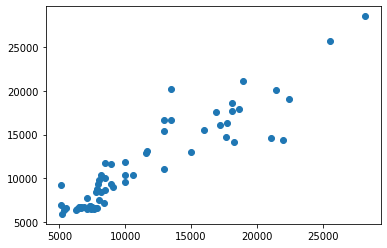

In [102]:
yhat =poly1.predict(x_test_pr1)

plt.scatter(y_test,yhat)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

</div>


El precio real de los autos es mayor que el estimado para autos mayores a 10,000 dls. Por otro lado, se observan precios estimados más altos que el real para automos menores a 10,000 dls

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [103]:
RidgeReg = Ridge(alpha=10) 
RidgeReg.fit(x_train, y_train)
RidgeReg.score(x_test, y_test)

0.7665372487960035

# **Graded Review Questions**

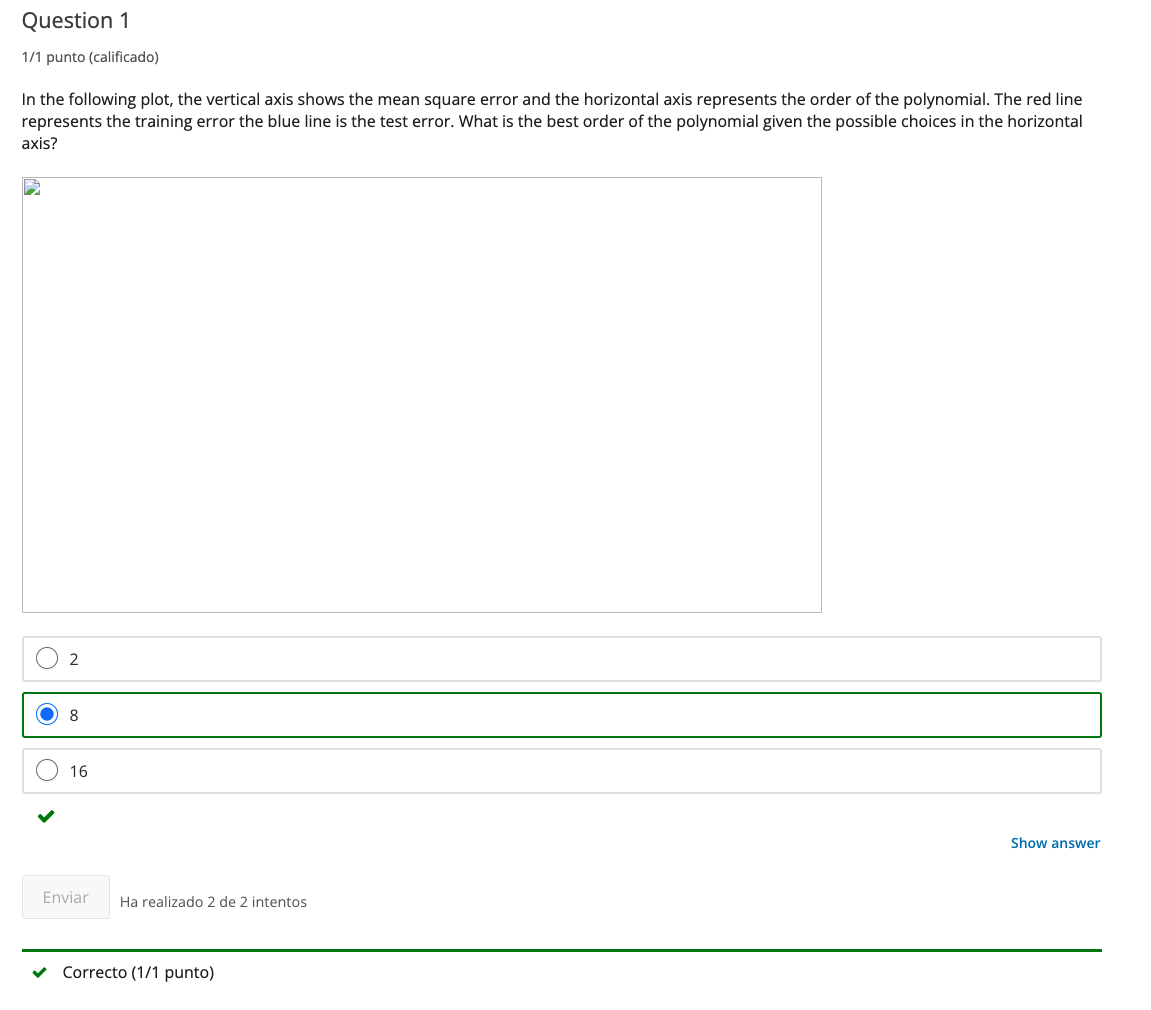

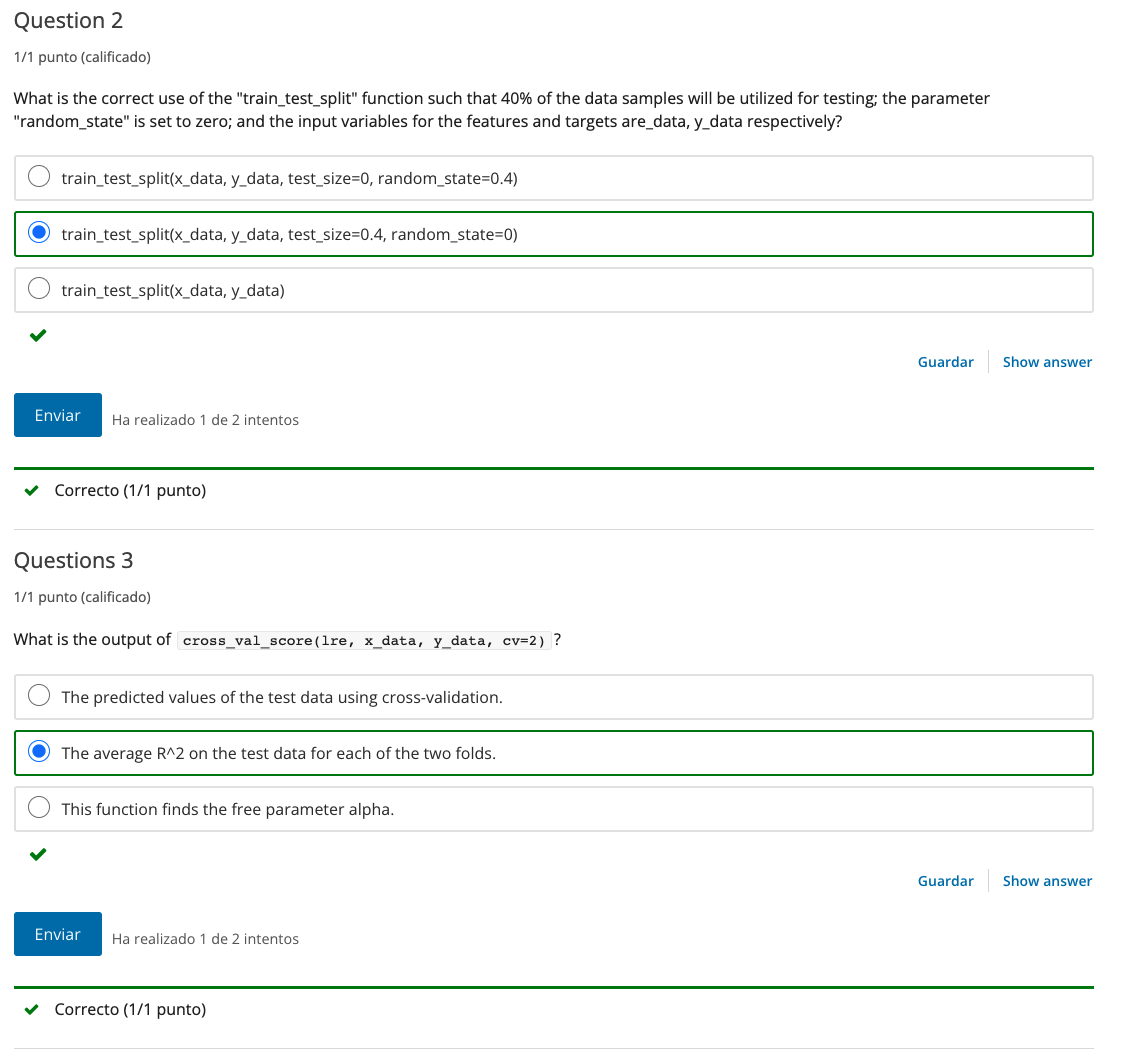

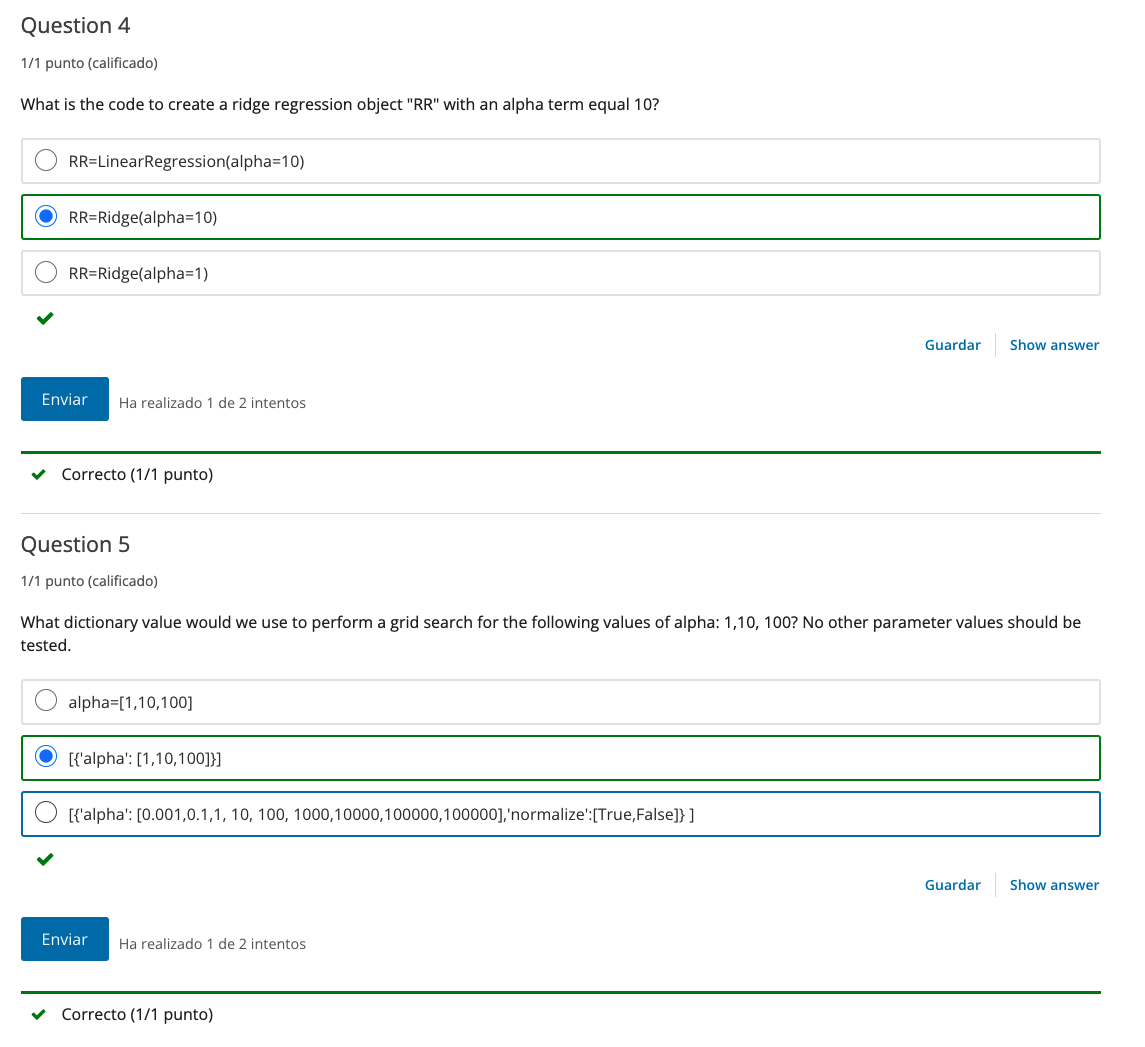

# Evidencia de avance del curso

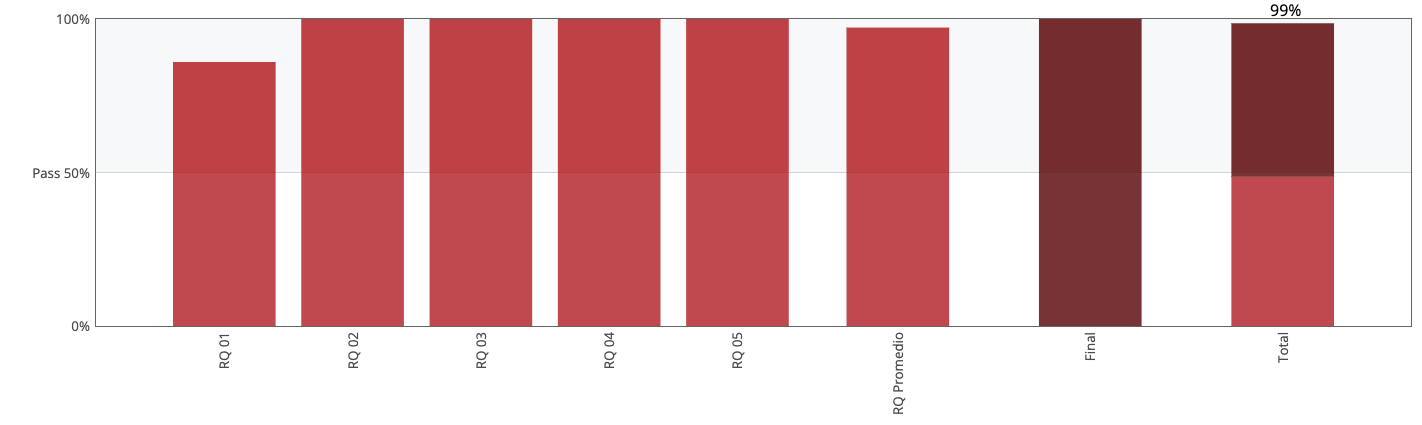

-- Fin de la actividad --